# Day 4, art w python

Inspired by _Schotter_ by [George Ness](https://en.wikipedia.org/wiki/Georg_Nees).

![Schotter, Georg Ness](http://www.medienkunstnetz.de/assets/img/data/2872/bild.jpg)


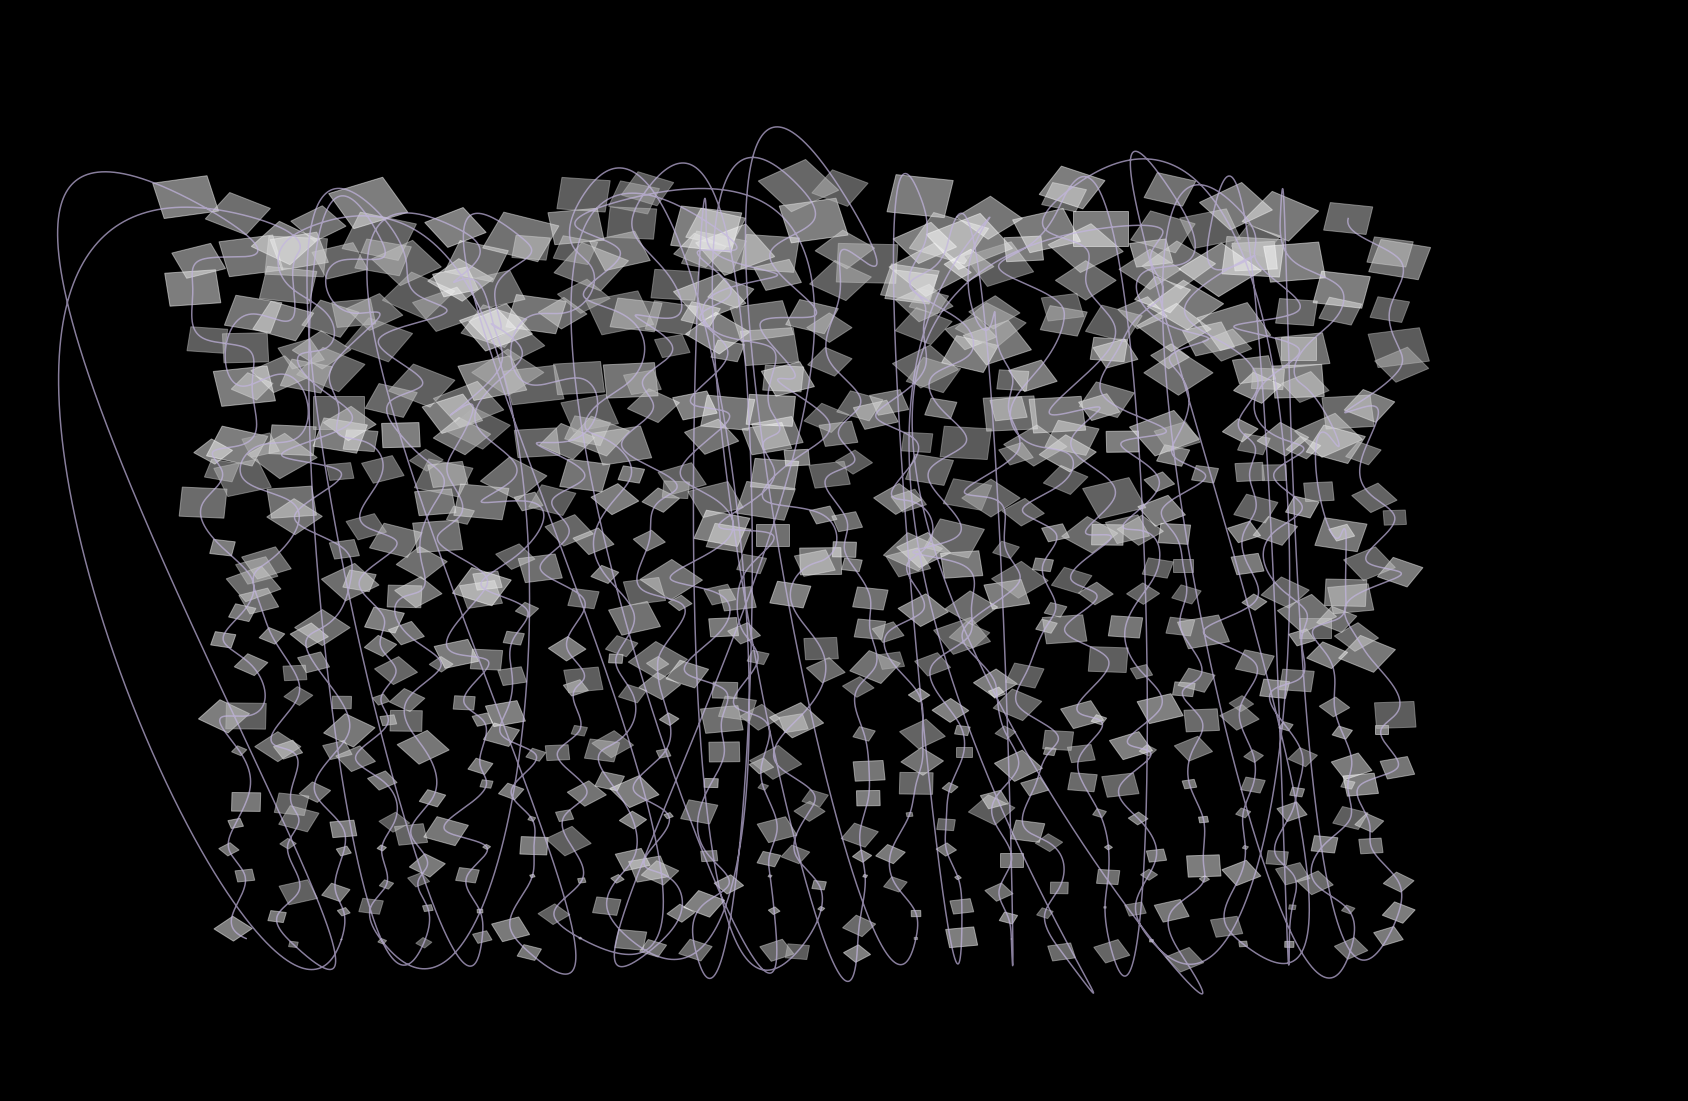

In [431]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random as rand
from scipy import interpolate

fig, ax = plt.subplots(figsize=(30,20))

fig.patch.set_facecolor('black')

def rotate(x: float, y: float, xo: float, yo: float, theta: float) -> tuple: 
    ''' Rotate x, y around origin x, y by theta (in radians)
    '''
    xr = math.cos(theta) * (x - xo) - math.sin(theta) * (y - yo) + xo
    yr = math.sin(theta) * (x - xo) + math.cos(theta) * (y - yo) + yo
    return xr, yr

def patch_rect_from_center(center_pt: tuple, width: float, height: float, rotation=0., fill_color = [0,0,0], alpha_value=0.) -> object:
    ''' Create a matplotlib.patch from center point
    '''
    x_origin = center_pt[0] - width / 2
    y_origin = center_pt[1] - height / 2
    
    return patches.Rectangle((x_origin, y_origin), width, height, angle=rotation, color=fill_color, alpha=alpha_value)

def get_rect_center(rect: object) -> tuple:
    ''' Get centroid of patch rectangle, including rotated rectangles
    ''' 
    x0, y0 = rect._x0, rect._y0
    
    # account for attribute path.Rectangle._x1, _y1 not being rotated
    if rect.angle is not 0.0:
        x1, y1 = rotate(rect._x1, rect._y1, x0, y0, math.radians(rect.angle))
    else:
        x1, y1 = rect._x1, rect._y1
        
    x = ( x0 + x1 ) / 2
    y = ( y0 + y1 ) / 2
    
    return x, y

def draw_patches(patches: list, **kwargs):
    # Size of canvas
    ax.set_xlim(-50, 300) 
    ax.set_ylim(-50, 300) 

    if 'debug' in kwargs and kwargs['debug']:
        plt.grid(which='both')
    else:
        plt.axis('off')
        
    for p in patches: 
        ax.add_patch(p)
    
def connect_patches(patches: list, col=[0,0,0], **kwargs):
    '''Draw a line between centerpoints of patches
    '''
    
    x_list = []
    y_list = []
    
    for p in patches:
        x, y = get_rect_center(p) 
        x_list.append(x)
        y_list.append(y)
        
    if 'close_crv' in kwargs and kwargs['close_crv']:
        x_list.append(x_list[0])
        y_list.append(y_list[0])
        
    if 'interpolate' in kwargs and kwargs['interpolate']:
        x_list, y_list = create_spline(x_list, y_list)
        
    plt.plot(x_list, y_list, c=col)
        
    
def create_spline(x_values: list, y_values: list) -> tuple:
    '''Interpolate plotted line
    '''
    samples = len(x_values) * 100
    tck, u = interpolate.splprep( [x_values, y_values], s = 0 )
    return interpolate.splev( np.linspace( 0, 1, samples), tck, der = 0)
    
rects = []

iterations = 25 

for x in range(iterations):
    for y in range(iterations):
        for i in range(1):
            s = .3*y + rand.random() * 6
            gray_value = rand.uniform(.7, 1.) 
            cv = [gray_value, gray_value, gray_value]
            rot = rand.randint(0,360)
            r = patch_rect_from_center((x*10,y*10), s, s, rotation=rot, fill_color = cv, alpha_value=.5)
            rects.append(r)
            
draw_patches(rects)
connect_patches(rects, col=[ rand.uniform(.7, 1.), rand.uniform(.7, 1.), rand.uniform(.7, 1.), .7], interpolate=True , close_crv=False)

plt.show()